In [14]:
### Notebook to compute the activation energy from a given R vs T, should just do the same that the group does in origin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

file = "../data/R1B9_RvsT_5mV_New.xlsx"
sheet_name = "Ithaca_all"
df = pd.read_excel(file, sheet_name=sheet_name)

# filter out negative current samples for regression to work
df = df.query("Current > 0")
temps = df["Temp"]
currents = df["Current"]
k_b = 1.3807e-23

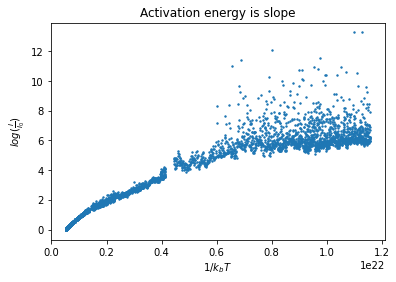

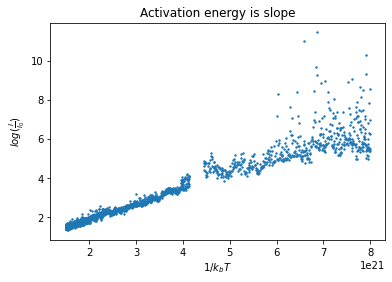

In [20]:
from math import log
%matplotlib inline
log_normed_current = [log(currents[0]/i) for i in currents]
inv_temp = [1/(k_b*t) for t in temps]
plt.scatter(inv_temp, log_normed_current, s=2)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")
plt.show()

slope_df = pd.DataFrame({"Reciptemp":inv_temp, "Log normed": log_normed_current})
filtered = slope_df.query("Reciptemp < 8e21")
filtered = filtered.query("1.5e21 < Reciptemp")
log_normed_current = filtered['Log normed']
inv_temp = filtered['Reciptemp']

plt.scatter(inv_temp, log_normed_current, s=2)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")
plt.show()
# 0.2 to 0.8

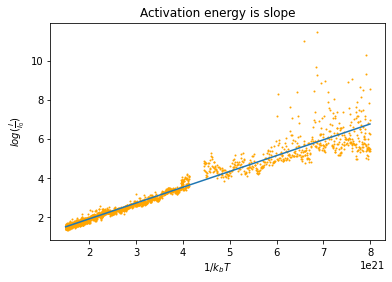

5.051925506535722


In [21]:
E_a, b = np.polyfit(inv_temp, log_normed_current,1)
plt.scatter(inv_temp, log_normed_current, color='orange', s=1)
plt.title("Activation energy is slope")
plt.xlabel("$1/k_bT$")
plt.ylabel("$log(\\frac{I}{I_0})$")

plt.plot(inv_temp, [i * E_a + b for i in inv_temp])
plt.show()
print(E_a/1.6e-19*1000)